# Lab 3: Vector Semantics 

In this lab, we'll be using some pre-trained word vectors to investigate phenomena such as word similarity, word analogies and semantic bias. 

Let's start by importing some stuff, as usual:

In [1]:
import io, os, itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

/home/marlene/anaconda3/envs/nlp_workshop/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## 1. Word similarities

The word vectors we are using are pre-trained "fastText" embeddings by Mikolov et al. (2017): <a href="https://arxiv.org/abs/1712.09405">Advances in Pre-Training Distributed Word Representations</a>. The full set consists of 1 million word embeddings, trained on a corpus of 16 billion word tokens (Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset). It can be found <a href="https://fasttext.cc/docs/en/english-vectors.html">here</a>. <a href="https://fasttext.cc/">fastText</a> also includes a library for building classifiers - feel free to have a look at it in your own time.

The size of the corpus and vocabulary used can give you an impression of the kinds of resources needed to train good vector representations, which is why we won't do it ourselves in this lab. The implementation itself is not beyond your level, and if you have too much time and a massive server at you disposal, feel free to try and implement some of the collocation vector methods we discussed, such as TF-IDF or PPMI.

These embeddings we're using here were obtained with a Neural Network. More on Neural Networks will follow later in this course. The basic idea is that it is a classifier trained to predict a word from its sourrounding context words. We then use the some of the *parameters* of that classifier as our word vectors. Word vectors from Neural Networks are usually called *embeddings*. Conceptually, this is very similar to collocation word vectors: *"know a word by the company it keeps"*. Mathematically, it is a bit different, because context words are never counted, and the Neural Net uses a different way of trial and error to find an optimal solution. It is also convenient because the result is a dense, low-dimensional word vector, instead of the sparse, high-dimensional collocation vectors we would get. This means that we can represent each word as a vector of 300 (float) numbers, instead of many thousands of counts (most of which are 0 anyways). 

The following code loads the word vectors:

In [2]:
#function from https://fasttext.cc/docs/en/english-vectors.html to read the word vectors from file
def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = np.array(tokens[1:],dtype=float).reshape((1,-1))
    return data

#load the word vectors
data_path = os.path.join(os.getcwd(), '../data', 'word_vectors.vec') # just using the first 10k fastText words!
data = load_vectors(data_path)

For this lab, I've selected the first 10k word embeddings for you to play with (the full 1M would crash my computer). Use the following function to check whether a word is in the selection or not (try it out on a few words of your choice):

In [3]:
def word_vector_exists(word):
    exist_status = "" if word in data.keys() else " not"
    return 'The word "{}" is{} in the dataset.'.format(word, exist_status)

#try calling this function on some words
word_vector_exists("dog")

'The word "dog" is in the dataset.'

Let's start looking at some similarities. We'll use the cosine similarity to test similarity between different pairs of words.

Below, write a function ```get_word_similarity()``` that
1. Takes 2 words as input
2. Checks if the words are both in the dataset
3. If one or both of the words are not in the dataset, prints an error message informing the user which word(s) was/were not found
4. If both words are in the dataset, retrieves their word vectors and computes their cosine similarity (just use <a href="http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html">scikit-learn's implementation</a>
5. Returns the cosine similarity.

Call the function on the following word pairs to test your function:
- "cat", "dog"
- "cat", "cat"
- "cat", "marsupial"

In [4]:
#Code here.
def get_word_similarity(word1, word2):
    #check if both words exist; inform the user if not
    word1_exists = word1 in data.keys()
    word2_exists = word2 in data.keys()
    if not word1_exists and not word2_exists:
        print('"{}" and "{}" both not found in word vectors'.format(word1,word2))
        return
    elif not word1_exists:
        print('"{}" not found in word vectors'.format(word1))
        return
    elif not word2_exists:
        print('"{}" not found in word vectors'.format(word2))
        return
    #now do the actual similarity scoring
    similarity = cosine_similarity(data[word1],data[word2])
    return similarity

get_word_similarity("cat", "hospital")

array([[0.30048332]])

### 1.1 Semantic similarity

Let's test some semantic similarities. Below, we have two lists of nouns from different categories:
- furniture
- furry animals
Let's test the hypothesis that same-category word pairs are more similar to one another than different-category word pairs.

Execute the code below to create 3 lists of word pairs:
1. furniture - furniture
2. animal - animal
3. furniture - animal

In [5]:
#word lists
animals = ["cat", "bear", "dog", "mouse", "sheep"]
furniture = ["table", "chair", "desk", "bed", "board"]

#pepare the word pairs
animal_pairs = [a for a in itertools.combinations(animals,2)]
furniture_pairs = [a for a in itertools.combinations(furniture,2)]
animal_furniture_pairs = [(a, b) for a in animals for b in furniture]

Next, to see if our similarity scoring works as expected:
1. Get a similarity score for each word pair, using your scoring function and the word lists above. Store it in a list/array\*.
2. Plot the similarity scores, using a plot of your choice. *Hint: The plot should be somehow grouped by categorgy, so you may have to create another array with the category label (animal, furniture, animal-furniture) for each word pair*

Is the result what you expected?
____________
\*For the array, you have to define the size in the beginning, which is ```len(animal_pairs + furniture_pairs + animal_furniture_pairs)```. If you are using a list, you can append scores, but be careful to turn the list into an ```np.array()``` before trying to plot the values!

/home/marlene/anaconda3/envs/nlp_workshop/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


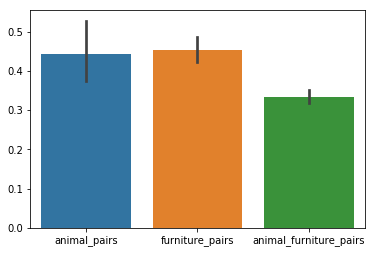

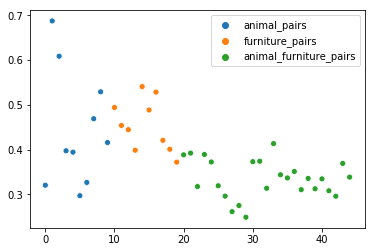

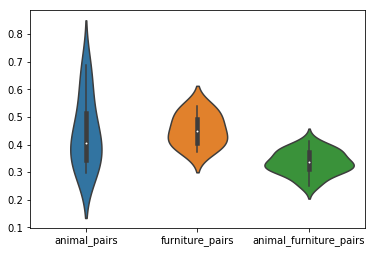

In [6]:
# Code here.
scores = np.zeros((len(animal_pairs + furniture_pairs + animal_furniture_pairs),))
labels = ["animal_pairs"]*len(animal_pairs)+["furniture_pairs"]*len(furniture_pairs)+["animal_furniture_pairs"]*len(animal_furniture_pairs)
labels = np.array(labels)

#iterate over pairs; keep the scores
for i, pair in enumerate(animal_pairs+furniture_pairs+animal_furniture_pairs):
    scores[i] = get_word_similarity(pair[0],pair[1])

# make a plot, e.g. barlplot
sns.barplot(labels,scores)
plt.show()

#or scatter plot grouped by colour?
sns.scatterplot(np.arange(len(labels)),scores,hue=labels)
plt.show()

#or a boxplot/violin plot?
sns.violinplot(labels,scores)
plt.show()

*Take notes here:*

### 1.2 Syntactic similarity

Now test whether adjectives are more similar to other adjectives, compared to adjective-noun pairs.
1. Create a list of 5 adjectives and another list of 5 nouns that are all in the data
2. Find the possible combinations, like I did above
3. Score the similarity of each pairing
4. Plot the similarities of pairs with the same or different part-of-speech

Are the results as expected?

/home/marlene/anaconda3/envs/nlp_workshop/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


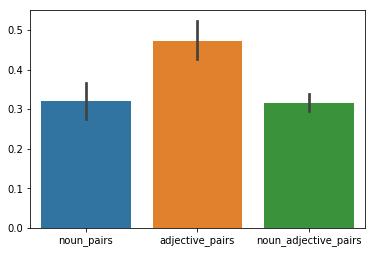

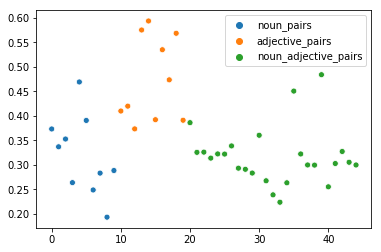

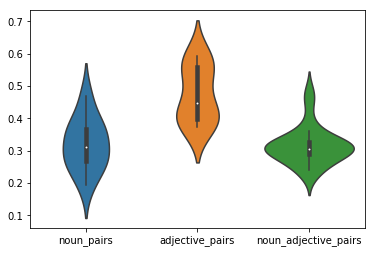

In [7]:
#Code here.
nouns = ["table", "dog", "mouse", "sun", "director"]
adjectives = ["green", "happy", "good", "excessive", "bright"]


#pepare the word pairs
noun_pairs = [a for a in itertools.combinations(nouns,2)]
adjective_pairs = [a for a in itertools.combinations(adjectives,2)]
noun_adjective_pairs = [(a, b) for a in nouns for b in adjectives]

#prepare scores and labels arrays
scores = np.zeros((len(noun_pairs + adjective_pairs + noun_adjective_pairs),))
labels = ["noun_pairs"]*len(noun_pairs)+["adjective_pairs"]*len(adjective_pairs)+["noun_adjective_pairs"]*len(noun_adjective_pairs)
labels = np.array(labels)

#iterate over pairs; keep the scores
for i, pair in enumerate(noun_pairs+adjective_pairs+noun_adjective_pairs):
    scores[i] = get_word_similarity(pair[0],pair[1])

# make a plot, e.g. barlplot
sns.barplot(labels,scores)
plt.show()

#or scatter plot grouped by colour?
sns.scatterplot(np.arange(len(labels)),scores,hue=labels)
plt.show()

#or a boxplot/violin plot?
sns.violinplot(labels,scores)
plt.show()

*Take notes here:*

### 1.3 Find closest

So far, we've been comparing similarities of chosen pairs of words. Let's now see if we can automatically find the most similar word to any given input word, using our word vectors. 

Write a function ```find_closest()``` that:

1. Takes 1 word as input
2. Checks if that word is in the data. If not, prints a warning for the user and returns immediately
3. Iterates over all the words in the data, computes the similarity between the input word and every word, and finds the one with the highest cosine similarity.\*
4. Returns the most similar word.

Test your function on a few words of your choice.
_____
\* A few hints for step 3:
- Use some variables (outside the loop) to keep track of which word is currently the most similar, and which score it has
- Make sure the input word itself doesn't get chosen

In [8]:
#Code here
def find_closest(input_word):
    if input_word not in data.keys():
        print("Input word not found in data")
        return
    #initialise the closest word to an empty string and closest score to -1 (the lowest possible score with cos)
    closest_word = ""
    closest_score = -1
    
    #go through all words in the data
    for word in data.keys():
        #make sure the word itself doesn't get chosen!
        if word == input_word:
            continue
        score = get_word_similarity(word,input_word)
        if score > closest_score:
            closest_score = score
            closest_word = word
        
    return closest_word

find_closest("cat")

'cats'

## 2. Analogies

Let's do some maths with words now! We'll write a function to solve the following analogies:
"King is to man like ____ is to woman". Formally, we can try to get the "blank" word by subtracting "man" from "king" and adding "woman":

____ = King - man + woman

Write a function that:
1. Takes 3 words as input
2. Checks if all 3 words are in the data; if not, print a warning for the user and return
3. Retrieves the word vectors for the 3 words and computes an ```analogy_vector```: word1 - word2 + word3. This should result in a new word vector
4. Finds the word in the data that has the most similar word vector to that ```analogy_vector```. *Hint: You may have to make a modified vecion of your* ```find_closest``` *function, which takes as input a vector instead of a word, and returns the closest word.*
5. Make sure the word that is returned is <b>not</b> one of the original 3 input words! *Hint: add that condition to your new* ```find_closest2``` *function*.

Try finding the following analogies with your function:
- King - man = ____ - woman
- France - Paris = ____ - Rome
- Actor - man = ____ - woman

Try a few more analogies on your own!

In [16]:
#Code here
def find_closest2(input_vector, exclude_list):
    #initialise the closest word to an empty string and closest score to -1 (the lowest possible score with cos)
    closest_word = ""
    closest_score = -1
    
    #go through all words in the data
    for word in data.keys():
        if word in exclude_list:
            continue
        score = cosine_similarity(data[word],input_vector)
        if score > closest_score:
            closest_score = score
            closest_word = word
        
    return closest_word

def find_closest_analogy(word1,word2,word3):
    exit=0
    #check if all words exist; inform the user if not
    if not word1 in data.keys():
        print('"{}" not found in word vectors'.format(word1))
        exit=1
    if not word2 in data.keys():
        print('"{}" not found in word vectors'.format(word2))
        exit=1
    if not word3 in data.keys():
        print('"{}" not found in word vectors'.format(word2))
        exit=1
    if exit:
        return
    
    #compute the analogy vector
    analogy_vector = data[word1] - data[word2] + data[word3]
    
    #find the closest match (make sure it's not one of the input words)
    analogy_word = find_closest2(analogy_vector,[word1,word2,word3])
    
    return analogy_word

#call the function
find_closest_analogy("politician","woman","man")

'businessman'

## 3. Good words and bad words

You might have come across sentiment analysis, and <a href="http://sentiwordnet.isti.cnr.it/">the kinds of word lists with human sentiment ratings</a> that help you decide how positive/negative each word is.

Let's now make automatic "sentiment" ratings: Assuming a positive word is more close to positive words than negative words, we can use the similarity score between an input word and a list of positive/negative words as our "sentiment score".

Below, write a function ```sentiment_score``` that:
1. Takes 1 word as input
2. Checks if that word is in the data. If not, prints a warning for the user and returns immediately
3. Defines 2 lists of minimum 5 words each: ```positive_words``` and ```negative_words``` (*use 'obviously' good/bad words such as "good", "bad", "positive", "negative", ... Make sure they are all in the data!*)
4. Calculates a similarity scores between the word and a.) each positive word b.) each negative word (keep the positive and negative scores in seperate arrays)
5. Calculates the average ```positive_similarity``` and ```negative_similarity```
6. Calculates a sentiment score as: ```positive_similarity - negative_similarity```

Try a few words of your choice. Is the result expected? (Words we expect to be negative should get a score below 0, words we expect to be positive should get a score above 0!)

In [21]:
#Code here.
def sentiment_score(input_word):
    if not input_word in data.keys():
        print("Input word not found in data")
        return
    #define a list of positive and negative words
    positive_words = ["good", "great", "positive", "best","awesome", "wonderful", "perfect"]
    negative_words = ["bad", "worst", "sad", "negative", "awful", "terrible", "horrible"]
    #keep a list of scores
    positive_scores = np.zeros((len(positive_words),))
    negative_scores = np.zeros((len(negative_words),))
    #score each word
    for i, word in enumerate(positive_words):
        positive_scores[i] = get_word_similarity(input_word,word)
    
    for i, word in enumerate(negative_words):
        negative_scores[i] = get_word_similarity(input_word,word)
    neg_score = np.mean(negative_scores)
    pos_score = np.mean(positive_scores)
    total_score = pos_score - neg_score
    return total_score

sentiment_score("boy")

-0.0005663562055261973

*Take notes here:*

## 4. Visualising word embeddings/PCA [A]

So far, we've gained an intuition about the power of word embeddings, using similarity scores and analogies. But it's a bit hard to imagine/visualise these word vectors, who live in a 300-dimensional space (let alone 100k-dimensional or higher, as might be the case for sparse collocation vectors!). 

Let's reduce the dimensionality of these word embeddings to 2, and plot them in a 2-d space, to get an impression of what they look like. Dimensionality reduction is also useful for turning sparse word vectors into dense, lower-dimensional ones. It can also help improve the performance of certain classifiers, if we transform our input features to a lower-dimensional space.

Here, we'll use Principal Component Analysis (PCA) to transform out vector embeddings into 2-D representations. We won't have time to go into the theory behind PCA in this course, but if you are interested and have time, <a href="https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues">this Stackoverflow question and its top answer</a> is the best intro to PCA I have read so far. Feel free to read to whichever level (grandmother, mother, spouse, daughter) you feel comfortable with ;) It's a technique well worth knowing about in Machine Learning, so if you are interested and have some spare time in the end of this lab, I encourage you to read up about it (and maybe google for some additional materials).

The basic idea is to find to dimensions of most variance, turn the parameter space to line up with those dimensions, an then flatten everything like a pancake. Don't worry if this doesn't make sense to you right now - luckily, sklearn will do the rest of the maths for us.

To prepare the data, you need to merge all the word vectors into a single numpy array called X (with shape (10000,300)). I've provided some code below to help you do this (this might take a minute or so to run):

In [11]:
# prepare the data
X = np.empty((0,300)) #initialise an empty array with no values, to concatenate stuff to in the loop below

for word in data.keys():
    X = np.concatenate((X,data[word]))

X.shape

(10000, 300)

Instantiate the <a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">```PCA```</a> class with ```n_components=2```. ```.fit()``` PCA to ```X```. 

Finally, pick a few words to plot (e.g., use the animals and furniture lists from above). Look up and transform each word vector in the list, using the PCA object's ```.transform()``` method. Store the transformed vectors in a new array (use one array per category, e.g., ```X_animals``` and ```X_furniture```). Now you can plot the two word vector dimensions ```X_animals[:,0]``` and ```X_animals[:,1]```, using ```sns.scatterplot()```. *Hint: If you call* ```sns.scatterplot()``` *twice in a row with different input arrays, and then use* ```plt.show()```, *matplotlib will automatically plot the two data arrays in the same figure, using different colours.*

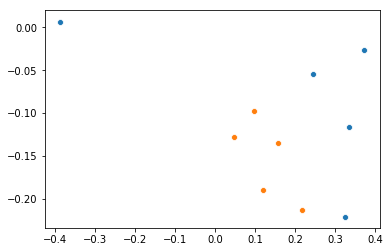

In [12]:
#Code here
pca = PCA(n_components=2)
pca.fit(X)
#create a new array with the 2D-vectors for the chosen words
X_animals = np.empty((0,2))
for word in animals:
    word2d = pca.transform(data[word])
    X_animals = np.concatenate((X_animals,word2d))    
X_furniture = np.empty((0,2))
for word in furniture:
    word2d = pca.transform(data[word])
    X_furniture = np.concatenate((X_furniture,word2d))

#plot the two new arrays
sns.scatterplot(X_animals[:,0],X_animals[:,1])
sns.scatterplot(X_furniture[:,0],X_furniture[:,1])
plt.show()

## 5. Findings
In this lab, we've just been playing with pre-trained vectors, so our findings about real linguistic and conginive phenomena may be limited. Nevertheless, reflect on the kinds of things you have explored in this lab, and what they have taught you about words and word embeddings:

1. Does the distributional hypothesis seem to be correct? Do word embeddings reflect meaningful connections/similarities between words?
2. Are there any biases reflected in these word embeddings? Can you think of a scenario were the relationships between word embeddings would be problematic (e.g., from an ethical perspective)?
3. Can you use word vectors for sentiment classification? Could you think of any other classification task where you might apply a similar method?
4. How could you use word embeddings to improve our depression/schizophrenia classifier (from lab 2)? What would be the features? Is there a new way of representing a sentence?

*Take notes here:*